# Viral Tweets

The goal of the project is to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. Let's take a look at the dataset first and think about which features of a tweet are most closely linked to its popularity. 

In [1]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])

#Print the user here and the user's location here.
print(all_tweets.loc[0]["user"])
print(all_tweets.loc[0]["user"]["location"])


11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_cou

# Defining Viral Tweets

As the K-Nearest Neighbor classifier is a surpervised machine learning algorithm, all the data in the dataset have to be tagged labels. Simplicitly, I would label the data based on the number of retweets the tweet has. If one tweet has retweets more than the median number of the retweets, it would be classified as `is_viral` with label `1`; otherwise, it would be classieied `0`. 

In [4]:
import numpy as np

tweet_median= np.median(all_tweets["retweet_count"])
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > tweet_median, 1, 0)
viral_tweet_number=all_tweets['is_viral'].value_counts()
print(tweet_median)
print(viral_tweet_number)

13.0
0    5562
1    5537
Name: is_viral, dtype: int64


# Making Features

I would select the `length of the tweet`, `the number of followers of each user` and `the number of friends of each user` as the features. 


In [5]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: len(tweet['user']), axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: len(tweet['user']), axis=1)

# Normalizing The Data

Let's select the data and label, as well as normalizing the data using the `scale` function. By normalizing the data, we could reduce the influence of their scale.

In [7]:
from sklearn.preprocessing import scale

labels=all_tweets['is_viral']
data=all_tweets[['tweet_length', 'followers_count', 'friends_count']]
scaled_data=scale(data, axis=0)
print(scaled_data[0])

[0.6164054  0.43059338 0.43059338]


# Creating the Training Set and Test Set

Now let's divide the data into the a training set and a test set: the training set is used for building the model and the test set is used for validate the accuracy of the model. To do this, I would call `train_test_split` function in the scikit-learning liibrary. Also, the `test_size` parameter would be set to 0.2, meaning that 20% of the data would be divided into the test set; the `random_state` would be set to 1, ensuring that I could produce the same splitting result each time. 

In [19]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels=train_test_split(scaled_data, labels, test_size=0.2, random_state=1)

# Using the Classifier

The tunning parameter of K-Nearest Neighbors is the `k`, which is the `k` nearest neighbors of the unclassified data. The validation accuracy of the model changes as `k` changes: if `k` is very small, the validation accuracy would be low due to `overfitting`, which means that we're assuming the data in the real world will always behave exactly like the training data; if `k` is very larger, the classifier doesn't pay enough attention to the small quirks in the training set and would result with the `underfitting`. To find the best `k`, we would loop through `1` to `200` and plot against the accuracy of the model. 


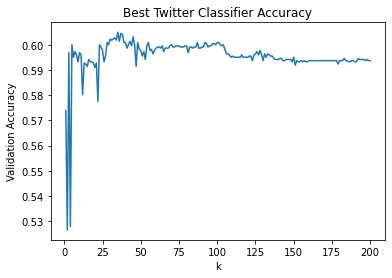

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

accuracies=[]
for k in range(1,201):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    accuracies.append(classifier.score(test_data, test_labels))
k_list=range(1,201)

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Best Twitter Classifier Accuracy")
plt.show()

From the graph above, we could conclude that the best `k` should be around 40 and the highest accuracy is around 0.60

In [26]:
classifier=KNeighborsClassifier(n_neighbors=33)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.6027027027027027


In [31]:
print(test_data[0])
classifier.predict(test_data)

[ 0.6164054  -2.32237662 -2.32237662]


array([1, 1, 1, ..., 1, 1, 1])

# Conclusions 

With the current features and the K number of 33, we are able to get up to around 60% accuracy. To further improve the current model, we could include more features. 
